In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import time
import datetime
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 10

In [2]:
# test= pd.read_csv('E:/University of Bremen MSc/masters_thesis/IAT_sebastian/dataset_26_april_3.csv')
# test=pd.read_csv('/home/atif/dataset_26_april_3.csv')
test= pd.read_csv('/media/atif/BE0E05910E0543BD/University of Bremen MSc/masters_thesis/IAT_sebastian/dataset_26_april_3.csv')

In [3]:
longTime=test.loc[0:,['longTime']]
longTime=longTime.as_matrix()
a=[]
date_time_array=[]
for k in longTime:
    a=np.append(a,k)
str_time=[]
correct_longtime=[]
datetime_time=[]
count=0
for b in a:
    b=int(b) # make plain integer
    str_b=str(b)
    c=str_b[-3:]
    new_str_b=str_b.replace(c, '',1)
    new_str_b_time=int(new_str_b)
    correct_longtime.append(new_str_b_time)
    now_time=datetime.datetime.fromtimestamp(new_str_b_time)
    convert_time=now_time.strftime('%Y-%m-%d %H:%M')
    str_time.append(convert_time)
# print(str_time)
test_new = test.assign(stringTime=str_time,correct_longtime=correct_longtime) # here new column in the panda dataframe for string_time has added

/home/atif/anaconda3/envs/venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [4]:
test_new['dateTime'] =  pd.to_datetime(test_new['stringTime'], format='%Y-%m-%d %H:%M')

In [5]:
test_new.shape #ROWS, COLUMNS

(25000, 4223)

In [6]:
multivariate_data=test_new.loc[500:24999,['dateTime','AEDATZ_HO_V0','AEWIHO_T9AV2','AEWIHOAVABV2','RWWIHOA_HWT0',
                                          'AEWIHOAKZ_V0','AEDAHO_T9_V2']]
multivariate_data = multivariate_data.set_index('dateTime')
multivariate_data=multivariate_data.loc[::-1]
univariate_data=test_new.loc[500:24999,['dateTime','AEDAHO_T9_V2']]
univariate_data = univariate_data.set_index('dateTime')
univariate_data=univariate_data.loc[::-1]

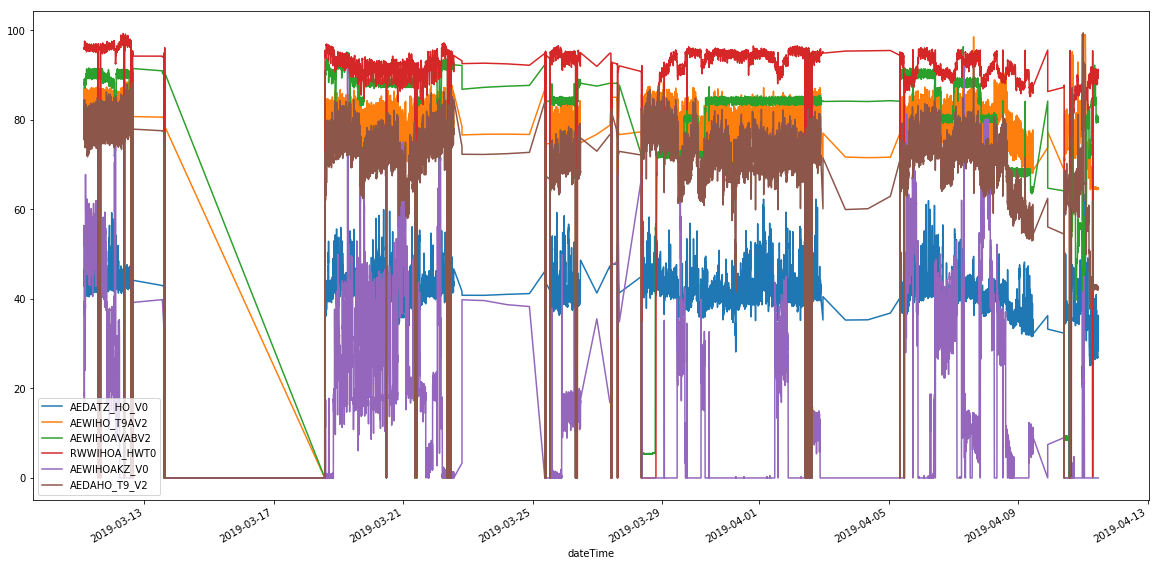

In [8]:
multivariate_data.plot()
plt.rcParams['figure.figsize'] =(20,10)
plt.show()

# dropping zero from multivariate dataset

In [42]:
from numpy import nan
multivariate_data_drop_zero= multivariate_data.replace(0,nan)
multivariate_data_drop_zero=multivariate_data_drop_zero.dropna(how='any',axis=0)

shape of multivariate_data:  (24500, 6)
shape of multivariate_data_drop_zero:  (13212, 6)


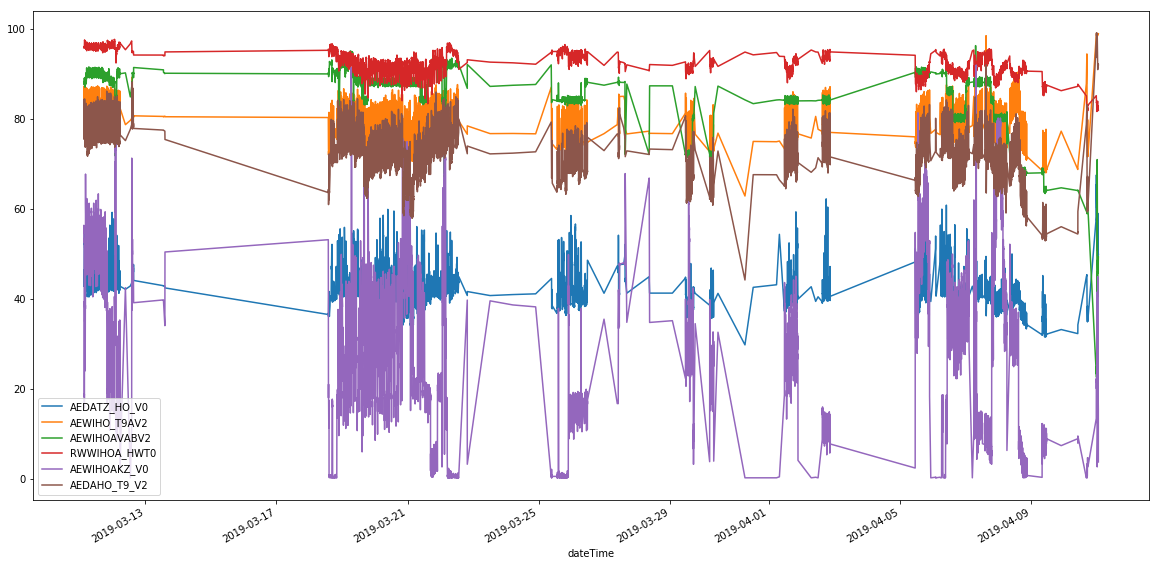

In [43]:
print('shape of multivariate_data: ',multivariate_data.shape)
print('shape of multivariate_data_drop_zero: ',multivariate_data_drop_zero.shape)

multivariate_data_drop_zero.plot()
plt.rcParams['figure.figsize'] =(20,10)
plt.show()

shape of univariate_data:  (24500, 1)


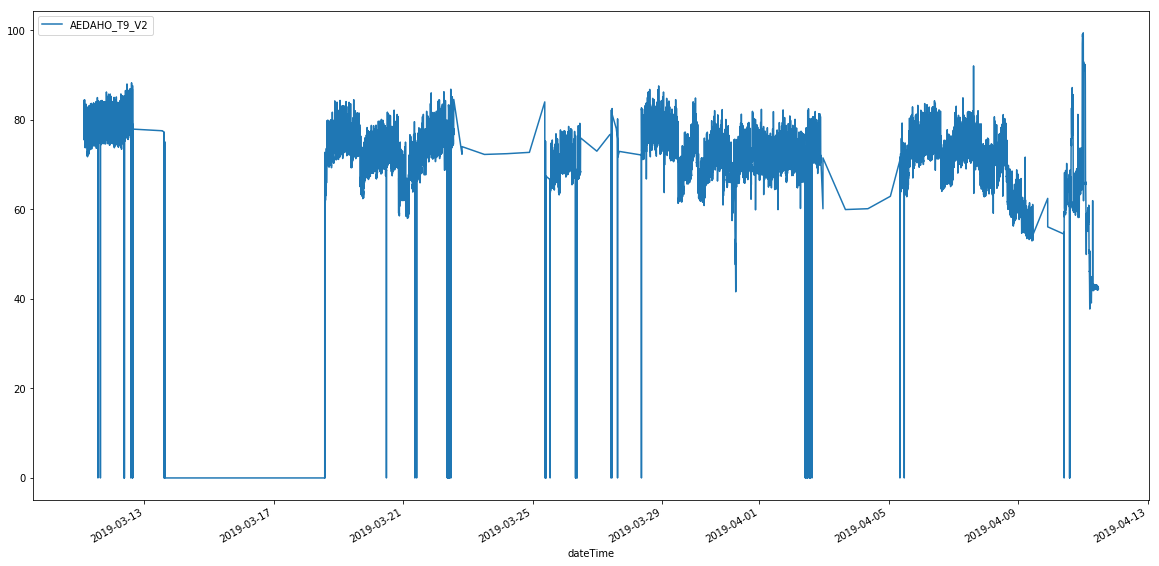

In [15]:
print('shape of univariate_data: ',univariate_data.shape)
univariate_data.plot()
plt.rcParams['figure.figsize'] =(20,10)
plt.show()

# dropping zero from univariate dataset

In [44]:
from numpy import nan
univariate_data_drop_zero= univariate_data.replace(0,nan)
univariate_data_drop_zero= univariate_data_drop_zero.dropna(how='any',axis=0)

shape of univariate_data:  (24500, 1)
shape of univariate_data_drop_zero:  (24410, 1)


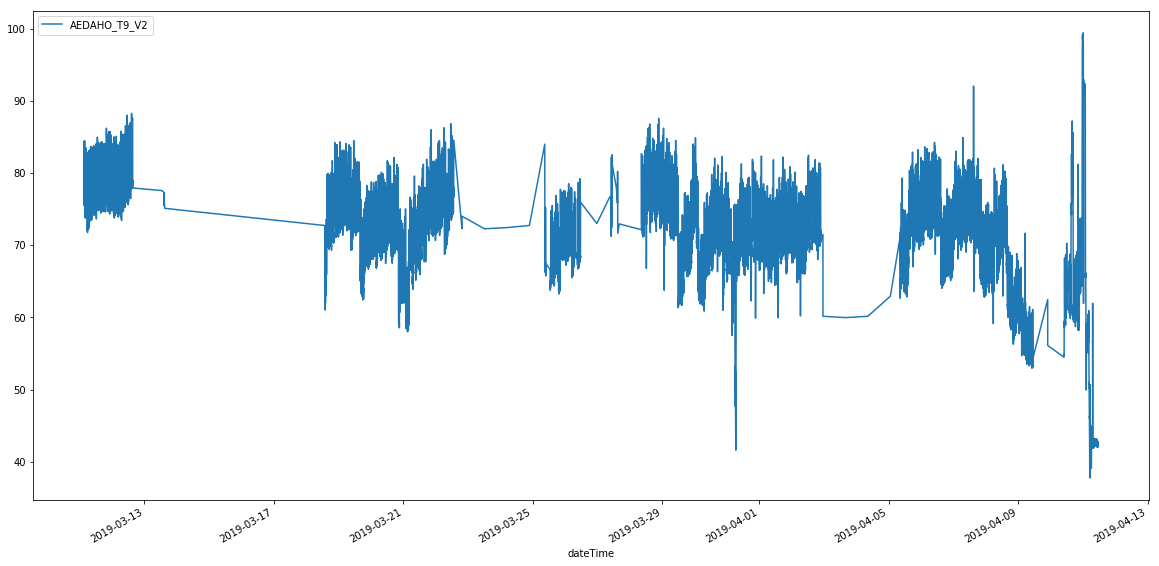

In [45]:
print('shape of univariate_data: ',univariate_data.shape)
print('shape of univariate_data_drop_zero: ',univariate_data_drop_zero.shape)

univariate_data_drop_zero.plot()
plt.rcParams['figure.figsize'] =(20,10)
plt.show()

In [9]:
null_columns_multivariate=multivariate_data.columns[multivariate_data.isnull().any()]
multivariate_data[null_columns_multivariate].isnull().sum()

Series([], dtype: float64)

In [46]:
null_columns_univariate=univariate_data.columns[univariate_data.isnull().any()]
univariate_data[null_columns_univariate].isnull().sum()

Series([], dtype: float64)

In [81]:
a=[1,2,3,4]
b=[1,2]
c=[1,2,3,4,5,6]

d=[a,b,c]

maxlen=max(map(len,d))
print(maxlen)

6


In [82]:
for i in d:
    if len(i)<maxlen:
        i.extend(0 for _ in range(maxlen-len(i)))

In [83]:
print(d)

[[1, 2, 3, 4, 0, 0], [1, 2, 0, 0, 0, 0], [1, 2, 3, 4, 5, 6]]
